# Linear Regression

$$
h_\theta(x) = \theta_0 + \sum\limits_{j=1}^{n} \theta_j x_j
$$

In vector form, with

$$
x = (1, x_1, \ldots, x_n)^T, \quad \theta = (\theta_0, \theta_1,\ldots,\theta_n)^T
$$

we have:

$$
h_\theta(x) = \theta^Tx
$$

Loss Function

$$
J(\theta) = \frac{1}{2m} \sum\limits_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)^2
$$

Taking the gradient with respect to the whole parameter vector $\theta$:

$$
\nabla_\theta J(\theta) = \nabla_\theta \left[ \frac{1}{2m} \sum\limits_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)^2 \right] \\
$$

Bringing the constant outside and applying the chain rule:

$$
    \frac{1}{2m} \nabla_\theta \left[\sum\limits_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)^2 \right] \\
    \frac{1}{2m} \sum\limits_{i=1}^m 2\left( h_\theta(x^{(i)}) - y^{(i)}\right) \nabla_\theta \left[ h_\theta(x^{(i)}) - y^{(i)} \right] \\
$$

The $2$ constants cancel out and $\nabla_\theta y^{(i)} = 0$, because $y^{(i)}$ does not depend on $\theta$:

$$
    \frac{1}{m} \sum\limits_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right) \nabla_\theta h_\theta(x^{(i)})
$$

Since

$$
h_\theta(x^{(i)}) = \theta^Tx^{(i)}
$$

its gradient w.r.t. $\theta$ is:
$$
\nabla_\theta h_\theta(x^{(i)}) = x^{(i)}
$$

We have:

$$
\nabla_\theta J(\theta) = \frac{1}{m} \sum\limits_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right) x^{(i)}
$$

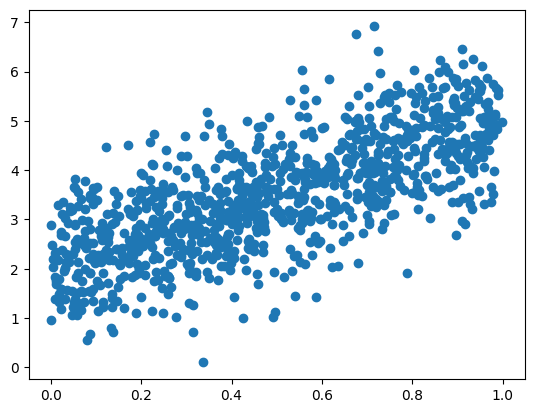

In [21]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(69)

n_samples = 1000
n_features = 1

x = np.random.rand(n_samples, n_features)
noise = np.random.normal(loc=0.0, scale=0.8, size=(n_samples, n_features))
y = 3.0 * x + noise + 2.0

plt.scatter(x, y);

In [22]:
test_size = 0.33
mask = np.random.rand(n_samples) < test_size
x_train, y_train = x[~mask], y[~mask]
x_test, y_test = x[mask], y[mask]
print(f"train: {len(y_train)}; test: {len(y_test)}")

train: 674; test: 326


test loss: 0.3808


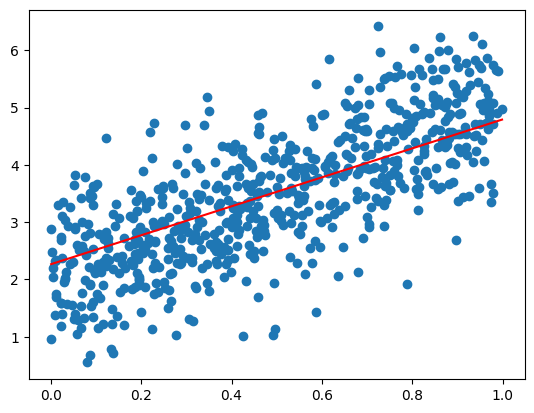

In [23]:
lr = 0.10
b = np.zeros(1)
w = np.zeros(n_features)

last_loss = 0.0
while True:
  y_pred = b + x_train @ w
  err = y_train - y_pred.reshape(*y_train.shape)
  loss = np.pow(err, 2).mean() / 2
  if abs(loss - last_loss) < 0.0001: break

  grad_w = -(x_train.T @ err).ravel() / n_samples
  grad_b = -err.sum() / n_samples
  w -= lr * grad_w
  b -= lr * grad_b

  last_loss = loss

y_pred = b + x_test @ w
err = y_test - y_pred.reshape(*y_test.shape)
loss = np.pow(err, 2).mean() / 2
print(f"test loss: {loss:6.4f}")

lx = np.linspace(x_train.min(), x_train.max(), num=n_samples).reshape(-1, 1)
ly = b + lx @ w
plt.scatter(x_train, y_train);
plt.plot(lx, ly, color="red");